In [2]:
import numpy as np
from math import sqrt, log
from collections import defaultdict
from itertools import chain, product
import pandas as pd
import matplotlib.pyplot as plt

def vectorize(sentence, vocabulary):
    result = [sentence.split().count(i) for i in vocabulary]
    return result

def convert_words_to_vectors(sentence):
    vectorized_sentence = []
    vocabulary = sorted(set(chain(*[words.lower().split() for words in sentence])))
    for words in sentence:
        vectorized_sentence.append((words, vectorize(words, vocabulary)))
    return vectorized_sentence, vocabulary

def dot_product_of_vectors(vector_one, vector_two):
    result = np.dot(vector_one, vector_two) / (sqrt(np.dot(vector_one, vector_one)) * sqrt(np.dot(vector_two, vector_two)))
    return result

def cosine_sim(sentence_one, sentence_two):
    sentences = [sentence_one, sentence_two]
    corpus, vocabulary = convert_words_to_vectors(sentences)
    similarity = [dot_product_of_vectors(a[1], b[1]) for a, b in product(corpus, corpus)]
    return similarity[1]

sentence_a = "The cosmic space is entirely divided across the solar system"
sentence_b = "The galaxy of this university is completely spreada across the solar system"
sentence_c = "Woman, without her man, is helpless.";
sentence_d = "Woman! Without her, man is helpless!"

print(cosine_sim(sentence_c, sentence_d))

0.22360679775


In [4]:
raw_data = pd.read_csv("combined_dataset_charlie.csv")
# len(raw_data.similarity_score.unique())
# len(raw_data.cosine_sem_sim.unique())

# Scatter Plot Between Lexical Diversity of Abstract and cosine similarity of an Abstract and Blog Post

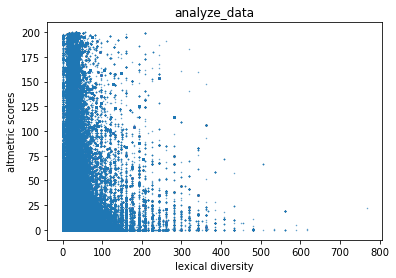

In [6]:
# Plot
val = [raw_data["altmetric_score"][index] for index in range(0, len(raw_data["altmetric_score"])) if raw_data["altmetric_score"][index] < 200]
valx = [raw_data["yules_i_for_abs"][index] for index in range(0, len(raw_data["altmetric_score"])) if raw_data["altmetric_score"][index] < 200]
plt.scatter(valx, val, s=0.2, alpha=0.8)
plt.title('analyze_data')
plt.xlabel('lexical diversity')
plt.ylabel('altmetric scores')
plt.show()


# Scatter Plot Between Lexical Diversity of Abstract and wordnet semantic similarity of an Abstract and Blog Post

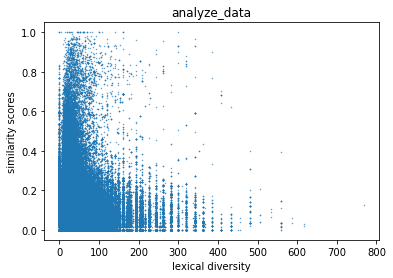

In [7]:
# Plot
# plt.scatter([x for x in raw_data["yules_i_measure_abs"][:100] if x < 200], raw_data["similarity_score"][:100], s=8.2, c=colors, alpha=0.8)
plt.scatter(raw_data["yules_i_for_abs"], raw_data["similarity_score"], s=0.2, alpha=0.8)
plt.title('analyze_data')
plt.xlabel('lexical diversity')
plt.ylabel('similarity scores')
plt.show()

# Scatter Plot Between Lexical Diversity of Blog and cosine similarity of an Abstract and Blog Post

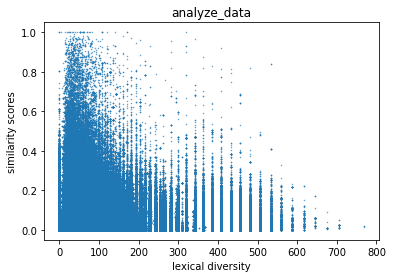

In [9]:
# plt.scatter([x for x in raw_data["yules_i_measure_abs"][:100] if x < 200], raw_data["similarity_score"][:100], s=8.2, c=colors, alpha=0.8)
plt.scatter(raw_data["yules_i_for_blg"], raw_data["similarity_score"], s=0.2, alpha=0.8)
plt.title('analyze_data')
plt.xlabel('lexical diversity')
plt.ylabel('similarity scores')
plt.show()

# Correlation matrix for the entire dataset

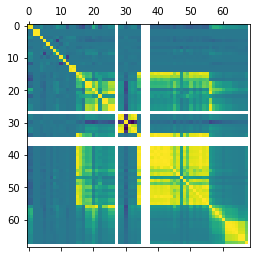

In [10]:
plt.matshow(raw_data.corr())
plt.show()

In [11]:
cr = pd.read_csv("correlation_matrix.csv")
cr

,Unnamed: 0,yules_i_for_abs,yules_i_for_blg,mendeley_readers,citeulikereaders,blogs_posts_count,news_unique_users,total_posts_count,wiki_posts_count,facebook_posts,twitter_posts
0,yules_i_for_abs,1.000000,0.007795,-0.038289,-0.060655,-0.111858,-0.096701,-0.070578,-0.066571,-0.052641,-0.062996
1,yules_i_for_blg,0.007795,1.000000,-0.003501,-0.005429,0.007631,0.010471,0.011041,0.001871,0.006442,0.010895
2,mendeley_readers,-0.038289,-0.003501,1.000000,0.789352,0.474286,0.076233,0.278862,0.164726,0.186126,0.270533
3,citeulikereaders,-0.060655,-0.005429,0.789352,1.000000,0.496189,0.068639,0.262735,0.254009,0.166740,0.252275
4,blogs_posts_count,-0.111858,0.007631,0.474286,0.496189,1.000000,0.554146,0.787212,0.373617,0.516025,0.767450
5,news_unique_users,-0.096701,0.010471,0.076233,0.068639,0.554146,1.000000,0.720378,0.192786,0.539525,0.689244
6,total_posts_count,-0.070578,0.011041,0.278862,0.262735,0.787212,0.720378,1.000000,0.226568,0.770406,0.994614
7,wiki_posts_count,-0.066571,0.001871,0.164726,0.254009,0.373617,0.192786,0.226568,1.000000,0.178279,0.204023
8,facebook_posts,-0.052641,0.006442,0.186126,0.166740,0.516025,0.539525,0.770406,0.178279,1.000000,0.721056
9,twitter_posts,-0.062996,0.010895,0.270533,0.252275,0.767450,0.689244,0.994614,0.204023,0.721056,1.000000
